In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
train = pd.read_csv('Train_aBjfeNk.csv')
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [112]:
train.shape

(8068, 11)

In [113]:
test = pd.read_csv('Test_LqhgPWU.csv')
test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [114]:
test.shape

(2627, 10)

In [115]:
train.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [116]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
ID                 8068 non-null int64
Gender             8068 non-null object
Ever_Married       7928 non-null object
Age                8068 non-null int64
Graduated          7990 non-null object
Profession         7944 non-null object
Work_Experience    7239 non-null float64
Spending_Score     8068 non-null object
Family_Size        7733 non-null float64
Var_1              7992 non-null object
Segmentation       8068 non-null object
dtypes: float64(2), int64(2), object(7)
memory usage: 693.4+ KB


In [117]:
categorical_variables = {'Gender', 'Ever_Married', 'Graduated', 'Var_1'}

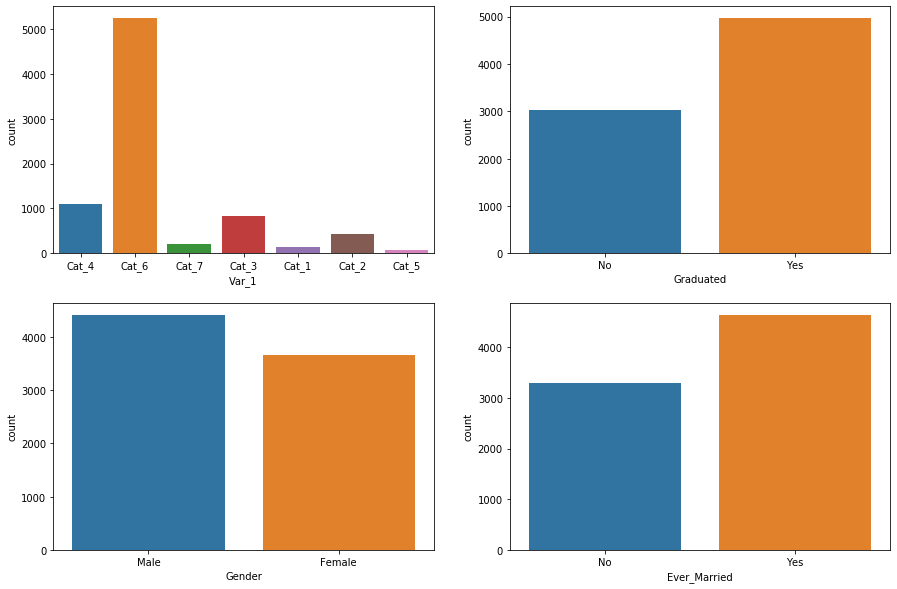

In [118]:
fig, ax = plt.subplots(2, 2, figsize=(15,10))
for i, subplot in zip(categorical_variables, ax.flatten()):
    sns.countplot(train[i], ax = subplot)

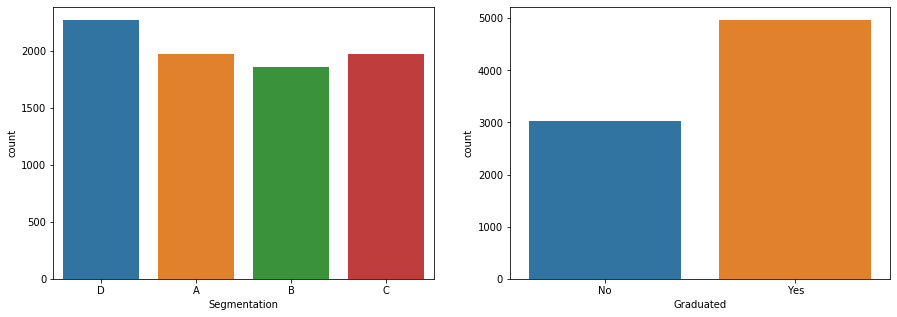

In [119]:
cat1 = {'Segmentation', 'Graduated'}
fig, ax = plt.subplots(1, 2, figsize=(15,5))
for i, subplot in zip(cat1, ax.flatten()):
    sns.countplot(train[i], ax = subplot)

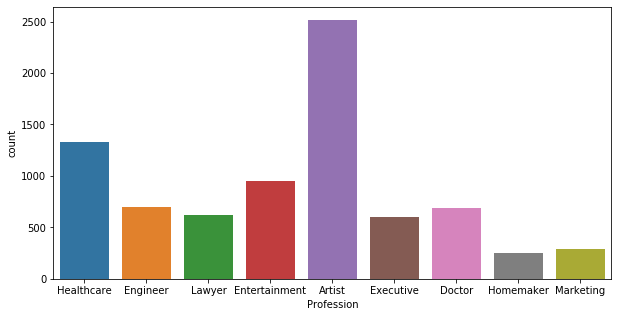

In [120]:
plt.figure(figsize=(10,5))
sns.countplot(train['Profession'])

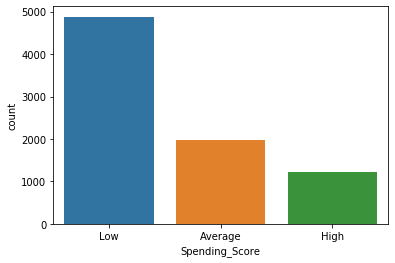

In [121]:
sns.countplot(train['Spending_Score'])

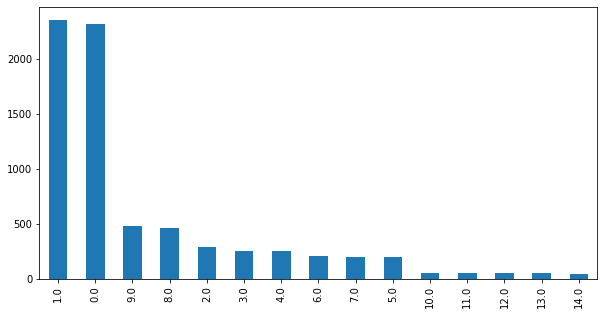

In [122]:
plt.figure(figsize =(10, 5))
train['Work_Experience'].value_counts().plot(kind = 'bar')

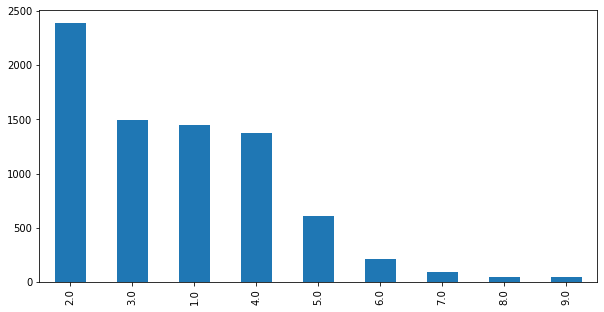

In [123]:
plt.figure(figsize =(10, 5))
train['Family_Size'].value_counts().plot(kind = 'bar')

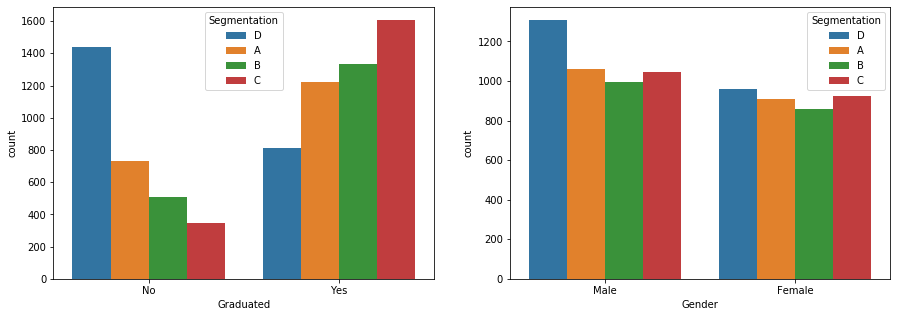

In [124]:
f, ax = plt.subplots(1,2, figsize =(15, 5))
sns.countplot(train['Graduated'], hue = train['Segmentation'], ax = ax[0])
sns.countplot(train['Gender'], hue = train['Segmentation'])

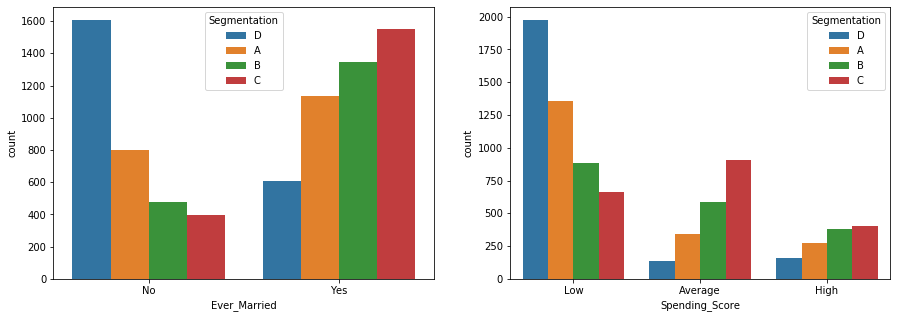

In [125]:
f, ax = plt.subplots(1,2, figsize =(15, 5))
sns.countplot(train['Ever_Married'], hue = train['Segmentation'], ax = ax[0])
sns.countplot(train['Spending_Score'], hue = train['Segmentation'])

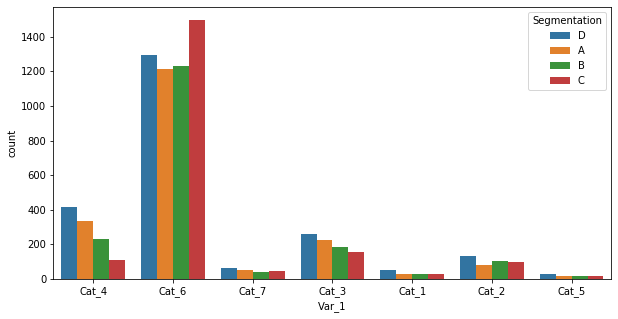

In [126]:
plt.figure(figsize=(10,5))
sns.countplot(train['Var_1'], hue = train['Segmentation'])

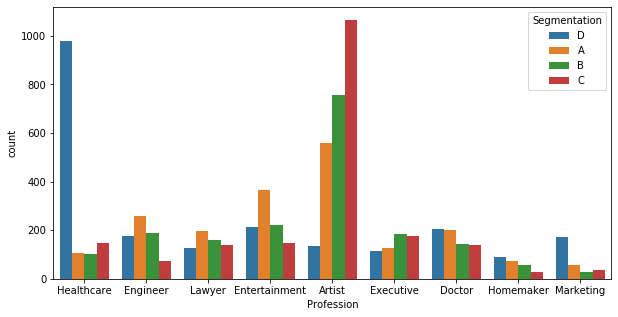

In [127]:
plt.figure(figsize=(10,5))
sns.countplot(train['Profession'], hue = train['Segmentation'])

In [128]:
train['Work_Experience'] = train['Work_Experience'].fillna(train['Work_Experience'].median())
train['Family_Size'] = train['Family_Size'].fillna(train['Family_Size'].median())

In [129]:
train['Segmentation'] = train['Segmentation'].replace({'A':1, 'B':2, 'C':3, 'D':4})

In [130]:
train['Ever_Married'] = train['Ever_Married'].fillna(train['Ever_Married'].value_counts().index[0])
train['Graduated'] = train['Graduated'].fillna(train['Graduated'].value_counts().index[0])
train['Profession'] = train['Profession'].fillna(train['Profession'].value_counts().index[0])
train['Var_1'] = train['Var_1'].fillna(train['Var_1'].value_counts().index[0])

In [131]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
ID                 2627 non-null int64
Gender             2627 non-null object
Ever_Married       2577 non-null object
Age                2627 non-null int64
Graduated          2603 non-null object
Profession         2589 non-null object
Work_Experience    2358 non-null float64
Spending_Score     2627 non-null object
Family_Size        2514 non-null float64
Var_1              2595 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 205.3+ KB


In [132]:
test['Work_Experience'] = test['Work_Experience'].fillna(test['Work_Experience'].median())
test['Family_Size'] = test['Family_Size'].fillna(test['Family_Size'].median())

In [133]:
test['Ever_Married'] = test['Ever_Married'].fillna(test['Ever_Married'].value_counts().index[0])
test['Graduated'] = test['Graduated'].fillna(test['Graduated'].value_counts().index[0])
test['Profession'] = test['Profession'].fillna(test['Profession'].value_counts().index[0])
test['Var_1'] = test['Var_1'].fillna(test['Var_1'].value_counts().index[0])

In [134]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [135]:
train.shape

(8068, 30)

In [136]:
test.shape

(2627, 29)

In [137]:
x_train = train.drop('Segmentation', axis = 1)
y_train = train['Segmentation']
x_test = test

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_pred = rf.fit(x_train, y_train).predict(x_test)
print("Accuracy is", rf.score(x_train, y_train))
map1 = {1: 'A', 2: 'B', 3: 'C', 4:'D'}
solution = pd.DataFrame({'ID': test.ID, 'Segmentation': np.vectorize(map1.get)(rf_pred)})
solution.to_csv('rf1.csv', index = False)

Accuracy is 1.0


In [57]:
from sklearn.ensemble import BaggingClassifier
bagg = BaggingClassifier()
bagg_pred = bagg.fit(x_train, y_train).predict(x_test)
print("Accuracy is", bagg.score(x_train, y_train))
map1 = {1: 'A', 2: 'B', 3: 'C', 4:'D'}
solution = pd.DataFrame({'ID': test.ID, 'Segmentation': np.vectorize(map1.get)(bagg_pred)})
solution.to_csv('bagg1.csv', index = False)

Accuracy is 0.9804164600892414
